In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
import plotly.express as px
import math
import numpy as np

# Instructions:
# 1) Save a copy of this notebook in your drive (File > Save a copy in Drive). Switch to it
# 2) Place "IPEDS_Dataset_Encoded" dataset in your Google drive
# 3) On the left of Colab click the folder icon, then Google drive icon. Allow access
# 4) Run this file

EFA_path = "/content/drive/MyDrive/IPEDS_Dataset_Encoded/Fall Enrollment/EFA_2015-2020_data.csv"
df_EFA = pd.read_csv(EFA_path)

# Select all students and sum together all years
df_EFA = df_EFA[df_EFA['efalevel']=='All students total']
df_EFA = df_EFA[["unitid", "year", "eftotlt", "efaiant", "efasiat", "efbkaat", "efhispt", "efnhpit", "efwhitt", "ef2mort", "efunknt", "efnralt"]]

In [ ]:
from scipy.stats import entropy
import math

def shannon_index(row):
  # https://en.wikipedia.org/wiki/Diversity_index
  row_ps = [row.airatio, row.asratio, row.bkratio, row.hiratio, row.nhratio, row.whratio, row.tmratio]
  return entropy(row_ps)

# Calculate ethnicity ratios and the diversity index
df_EFA['known_ethnicities_total'] = df_EFA.apply(lambda row: row.efaiant + row.efasiat + row.efbkaat + row.efhispt + row.efnhpit + row.efwhitt + row.ef2mort, axis=1)

In [ ]:
df_EFA = df_EFA[df_EFA["known_ethnicities_total"] != 0] #so we know at least on ethnicity
df_EFA['airatio'] = df_EFA.apply(lambda row: row.efaiant / row.known_ethnicities_total, axis=1)
df_EFA['asratio'] = df_EFA.apply(lambda row: row.efasiat / row.known_ethnicities_total, axis=1)
df_EFA['bkratio'] = df_EFA.apply(lambda row: row.efbkaat / row.known_ethnicities_total, axis=1)
df_EFA['hiratio'] = df_EFA.apply(lambda row: row.efhispt / row.known_ethnicities_total, axis=1)
df_EFA['nhratio'] = df_EFA.apply(lambda row: row.efnhpit / row.known_ethnicities_total, axis=1)
df_EFA['whratio'] = df_EFA.apply(lambda row: row.efwhitt / row.known_ethnicities_total, axis=1)
df_EFA['tmratio'] = df_EFA.apply(lambda row: row.ef2mort / row.known_ethnicities_total, axis=1)
df_EFA['diversity'] = df_EFA.apply(shannon_index, axis=1)
df_EFA['true_diversity'] = df_EFA.apply(lambda row: math.exp(row.diversity), axis=1)
df_EFA

,unitid,year,eftotlt,efaiant,efasiat,efbkaat,efhispt,efnhpit,efwhitt,ef2mort,...,known_ethnicities_total,airatio,asratio,bkratio,hiratio,nhratio,whratio,tmratio,diversity,true_diversity
0,100654,2020,5977,17,13,5140,62,4,111,76,...,5423,0.003135,0.002397,0.947815,0.011433,0.000738,0.020468,0.014014,0.279182,1.322048
26,100663,2020,22563,59,1466,4746,1050,8,12966,826,...,21121,0.002793,0.069410,0.224705,0.049714,0.000379,0.613891,0.039108,1.115575,3.051321
53,100690,2020,775,2,8,443,25,3,275,0,...,756,0.002646,0.010582,0.585979,0.033069,0.003968,0.363757,0.000000,0.879559,2.409836
74,100706,2020,9999,77,356,910,530,16,6901,364,...,9154,0.008412,0.038890,0.099410,0.057898,0.001748,0.753878,0.039764,0.913231,2.492362
101,100724,2020,4072,8,9,3668,52,6,173,49,...,3965,0.002018,0.002270,0.925095,0.013115,0.001513,0.043632,0.012358,0.355981,1.427581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753121,487630,2015,13,0,0,3,6,0,4,0,...,13,0.000000,0.000000,0.230769,0.461538,0.000000,0.307692,0.000000,1.057905,2.880332
753139,487649,2015,9,0,1,2,1,0,5,0,...,9,0.000000,0.111111,0.222222,0.111111,0.000000,0.555556,0.000000,1.149060,3.155225
753145,487658,2015,59,0,3,8,2,1,38,0,...,52,0.000000,0.057692,0.153846,0.038462,0.019231,0.730769,0.000000,0.883053,2.418270
753157,487667,2015,295,0,73,9,22,3,10,1,...,118,0.000000,0.618644,0.076271,0.186441,0.025424,0.084746,0.008475,1.149471,3.156523


In [ ]:
filename_fips = "/content/drive/MyDrive/county_fips_master.csv"
#from https://github.com/kjhealy/fips-codes
df_fips = pd.read_csv(filename_fips, encoding='latin-1')
df_fips.rename(columns = {"county_name":"countynm","state_name":"statenm"}, inplace = True)
df_fips = df_fips[["countynm","fips","statenm"]]
df_fips["fips"] = df_fips.apply(lambda row: str(row.fips).zfill(5), axis=1)
df_fips.head()

,countynm,fips,statenm
0,Autauga County,01001,Alabama
1,Baldwin County,01003,Alabama
2,Barbour County,01005,Alabama
3,Bibb County,01007,Alabama
4,Blount County,01009,Alabama


In [ ]:
# Create a dataframe with state/county information
HD_path = "/content/drive/MyDrive/IPEDS_Dataset_Encoded/Institutional Characteristics/HD_2015-2021_data.csv"
hd_df = pd.read_csv(HD_path)
hd_df = hd_df[["unitid", "year", "countynm","fips","longitud","latitude"]]
hd_df.rename(columns = {"fips": "statenm"}, inplace = True) # drop older years
hd_df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (13,23,48,49,50,51,52,53,54,70,71,74,75,76,77,78,79,80,81,82,83) have mixed types.Specify dtype option on import or set low_memory=False.



,unitid,year,countynm,statenm,longitud,latitude
0,100654,2021,Madison County,Alabama,-86.568502,34.783368
1,100663,2021,Jefferson County,Alabama,-86.799345,33.505697
2,100690,2021,Montgomery County,Alabama,-86.17401,32.362609
3,100706,2021,Madison County,Alabama,-86.640449,34.724557
4,100724,2021,Montgomery County,Alabama,-86.295677,32.364317
...,...,...,...,...,...,...
48461,487676,2015,Anne Arundel County,Maryland,-76.542916,38.980365
48462,487694,2015,Bergen County,New Jersey,-74.059771,40.875710
48463,487700,2015,Pinellas County,Florida,-82.731089,27.919522
48464,487719,2015,Pasco County,Florida,-82.727605,28.246401


In [ ]:
unitid_fips_df = pd.merge(df_fips,hd_df,on=["countynm","statenm"])
unitid_fips_df

,countynm,fips,statenm,unitid,year,longitud,latitude
0,Baldwin County,01003,Alabama,101161,2021,-87.778193,30.851343
1,Baldwin County,01003,Alabama,102395,2021,-87.91163,30.639329
2,Baldwin County,01003,Alabama,436641,2021,-87.681828,30.40611
3,Baldwin County,01003,Alabama,450933,2021,-87.653162,30.329288
4,Baldwin County,01003,Alabama,101161,2020,-87.778193,30.851343
...,...,...,...,...,...,...,...
46594,Sweetwater County,56037,Wyoming,240693,2019,-109.237126,41.590964
46595,Sweetwater County,56037,Wyoming,240693,2018,-109.237126,41.590964
46596,Sweetwater County,56037,Wyoming,240693,2017,-109.237126,41.590964
46597,Sweetwater County,56037,Wyoming,240693,2016,-109.237126,41.590964


In [ ]:
#https://www2.census.gov/programs-surveys/popest/datasets/2010-2020/counties/
#https://www2.census.gov/programs-surveys/popest/datasets/2020-2021/counties/totals/
POP_path1 = "/content/drive/MyDrive/co-est2020.csv"
POP_path2 = "/content/drive/MyDrive/co-est2021-alldata.csv"
pop_df_2010_2019 = pd.read_csv(POP_path1, encoding='latin-1')
pop_df_2010_2019.drop("POPESTIMATE2020", inplace = True, axis=1)
pop_df_2020_2021 = pd.read_csv(POP_path2, encoding = 'latin-1')
county_pop_df = pop_df_2010_2019.merge(pop_df_2020_2021, on=["STATE","COUNTY"])
county_pop_df = county_pop_df[["STATE","COUNTY"] + [f"POPESTIMATE{year}" for year in range(2010,2022)]]
county_pop_df["fips"] = county_pop_df.apply(lambda row: str((row.STATE*1000) + row.COUNTY).zfill(5), axis=1)
county_pop_df.head()

,STATE,COUNTY,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020,POPESTIMATE2021,fips
0,1,0,4785514,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,5024803,5039877,01000
1,1,1,54761,55229,54970,54747,54922,54903,55302,55448,55533,55769,58877,59095,01001
2,1,3,183121,186579,190203,194978,199306,203101,207787,212737,218071,223565,233140,239294,01003
3,1,5,27325,27344,27172,26946,26768,26300,25828,25169,24887,24657,25180,24964,01005
4,1,7,22858,22736,22657,22510,22541,22553,22590,22532,22300,22313,22223,22477,01007


In [ ]:
county_area_path = "/content/drive/MyDrive/LND01.csv"
county_area_df = pd.read_csv(county_area_path)
county_area_df["fips"] = county_area_df.apply(lambda row: str(row.STCOU).zfill(5), axis = 1)
county_area_df.rename(columns = {"LND110210D":"land_area"}, inplace = True)
county_area_df = county_area_df[["fips","land_area"]]
county_area_df.head()

,fips,land_area
0,00000,3531905.43
1,01000,50645.33
2,01001,594.44
3,01003,1589.78
4,01005,884.88


In [ ]:
county_density_df = county_area_df.merge(county_pop_df, on="fips")
county_density_df = county_density_df.merge(pd.DataFrame({"year":list(range(2010,2022))}), how="cross")
county_density_df

,fips,land_area,STATE,COUNTY,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020,POPESTIMATE2021,year
0,01000,50645.33,1,0,4785514,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,5024803,5039877,2010
1,01000,50645.33,1,0,4785514,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,5024803,5039877,2011
2,01000,50645.33,1,0,4785514,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,5024803,5039877,2012
3,01000,50645.33,1,0,4785514,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,5024803,5039877,2013
4,01000,50645.33,1,0,4785514,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,5024803,5039877,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38275,56045,2398.09,56,45,7198,7142,7075,7132,7134,7202,7228,6962,6895,6880,6809,6745,2017
38276,56045,2398.09,56,45,7198,7142,7075,7132,7134,7202,7228,6962,6895,6880,6809,6745,2018
38277,56045,2398.09,56,45,7198,7142,7075,7132,7134,7202,7228,6962,6895,6880,6809,6745,2019
38278,56045,2398.09,56,45,7198,7142,7075,7132,7134,7202,7228,6962,6895,6880,6809,6745,2020


In [ ]:
county_density_df["county_population"] = county_density_df.apply(lambda row: getattr(row,f"POPESTIMATE{row.year}"), axis = 1)
for year in range(2010,2022):
  county_density_df.drop(f"POPESTIMATE{year}", axis =1, inplace=True)
county_density_df["county_population_density"] = county_density_df.apply(lambda row: row.county_population/row.land_area, axis=1)
county_density_df["log_county_population_density"] = county_density_df.apply(lambda row: math.log(row.county_population_density), axis=1)

In [ ]:
merged_df = df_EFA.merge(unitid_fips_df, on=['unitid','year'])
merged_df = merged_df[["unitid", "true_diversity", 'diversity', "fips", "countynm", "statenm", "longitud","latitude","year", "eftotlt"]]  # leave only the relevant columns
merged_df = merged_df.merge(county_density_df, on=["fips","year"])
merged_df.head()

,unitid,true_diversity,diversity,fips,countynm,statenm,longitud,latitude,year,eftotlt,land_area,STATE,COUNTY,county_population,county_population_density,log_county_population_density
0,100654,1.322048,0.279182,01089,Madison County,Alabama,-86.568502,34.783368,2020,5977,801.59,1,89,389696,486.153769,6.186525
1,100706,2.492362,0.913231,01089,Madison County,Alabama,-86.640449,34.724557,2020,9999,801.59,1,89,389696,486.153769,6.186525
2,101462,2.810701,1.033434,01089,Madison County,Alabama,-86.572885,34.771858,2020,825,801.59,1,89,389696,486.153769,6.186525
3,101912,1.456317,0.375910,01089,Madison County,Alabama,-86.652705,34.756344,2020,1374,801.59,1,89,389696,486.153769,6.186525
4,417008,2.283126,0.825545,01089,Madison County,Alabama,-86.752565,34.681465,2020,164,801.59,1,89,389696,486.153769,6.186525


In [ ]:
# TO DO:
# 0) Explore other diversity metrics, implement the best
# 1) Add the baseline diversity for each county
# 2) Add the relative diversity of university vs county baseline
# 3) Visualize the diversity vs baseline on the map
# 4) Look for factors that explain unexpected diversity
# 5) Run tests to confirm the significance of the factors
# 6) Write up the report

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [ ]:
year_dfs = {}
for year in range(2015,2021):
    year_dfs[year] = merged_df[merged_df["year"] == year]

In [ ]:
diversity_df = year_dfs[2020].groupby("fips")["diversity"].mean()

In [ ]:
fig = px.choropleth(diversity_df, geojson=counties, locations=diversity_df.index, color='diversity',
                           color_continuous_scale="Viridis",
                           range_color=(0, 2),
                           scope="usa",
                           labels={'diversity':'Diversity index'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

AttributeError: ignored

In [ ]:
fig = px.choropleth(county_density_df, geojson=counties, locations="fips", color='log_county_population_density',
                           color_continuous_scale="temps",
                           range_color=(0,county_density_df['log_county_population_density'].max()),
                           scope="usa",
                           labels={'log_county_population_density':'log(People per square mile)'}
                          )
fig.title
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

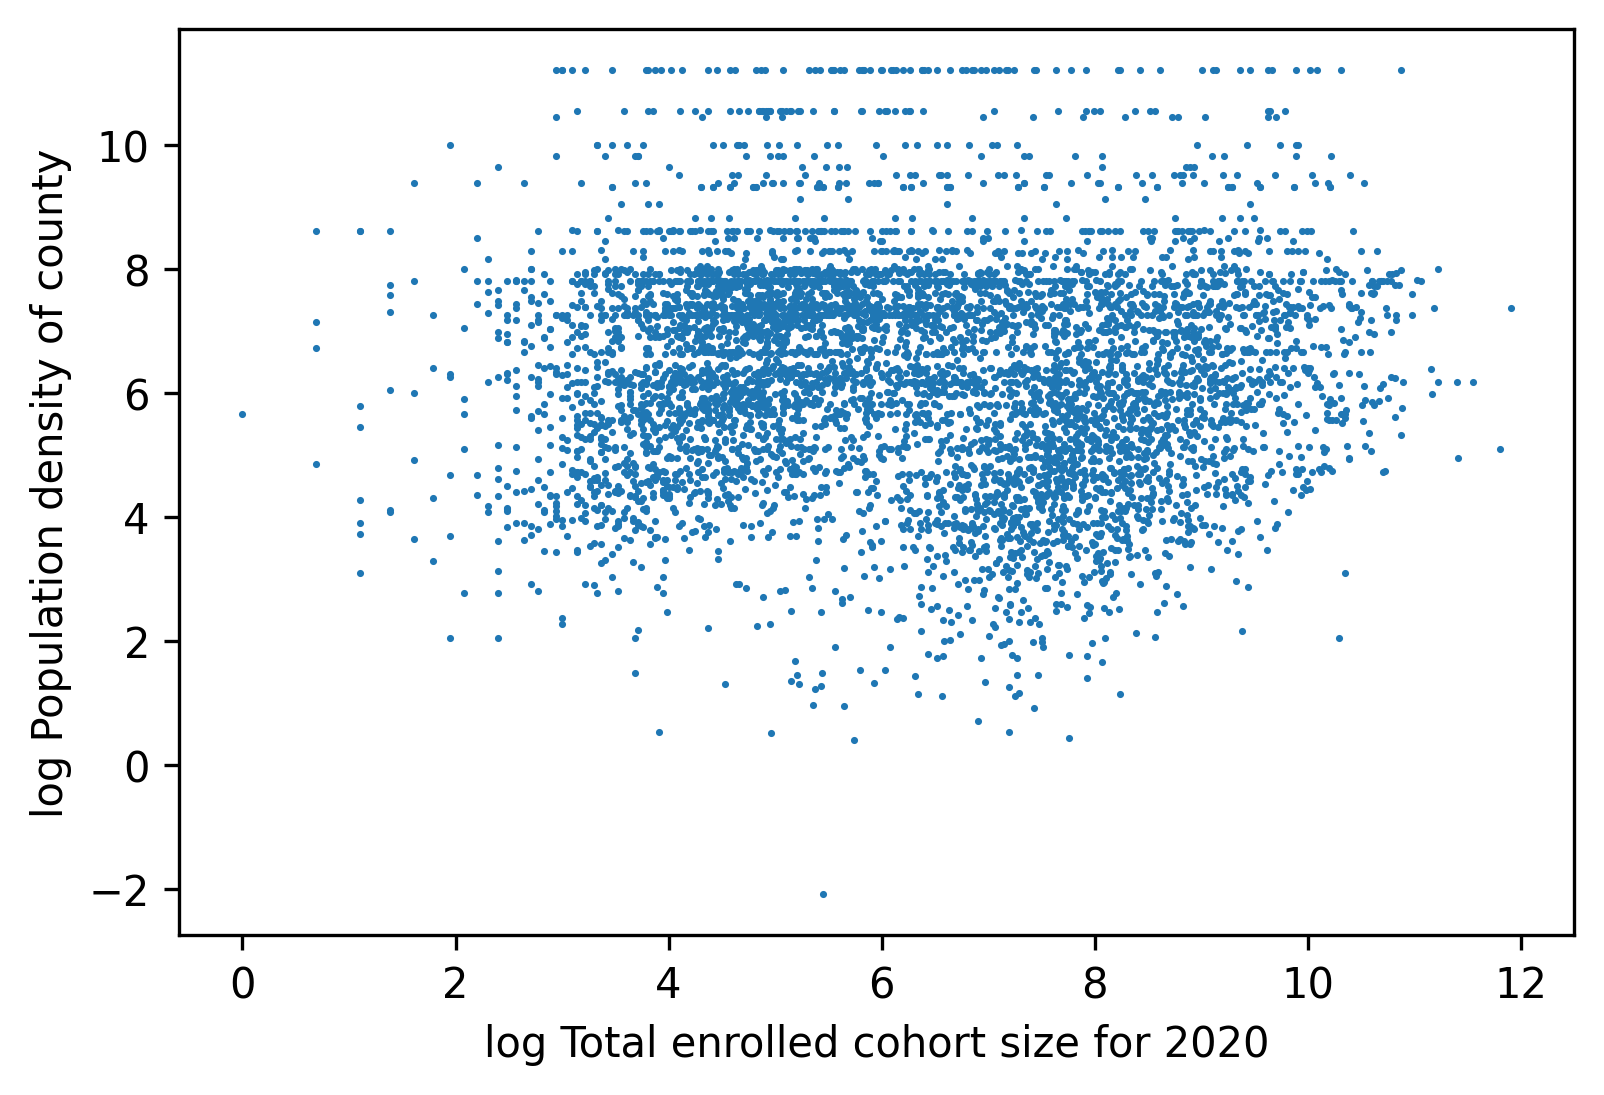

In [ ]:
x = df["eftotlt"].apply(lambda x: math.log(x))
y = df["log_county_population_density"]

plt.xlabel("log Total enrolled cohort size for 2020")
plt.ylabel("log Population density of county")

plt.scatter(x, y, s = 0.5)
plt.show()

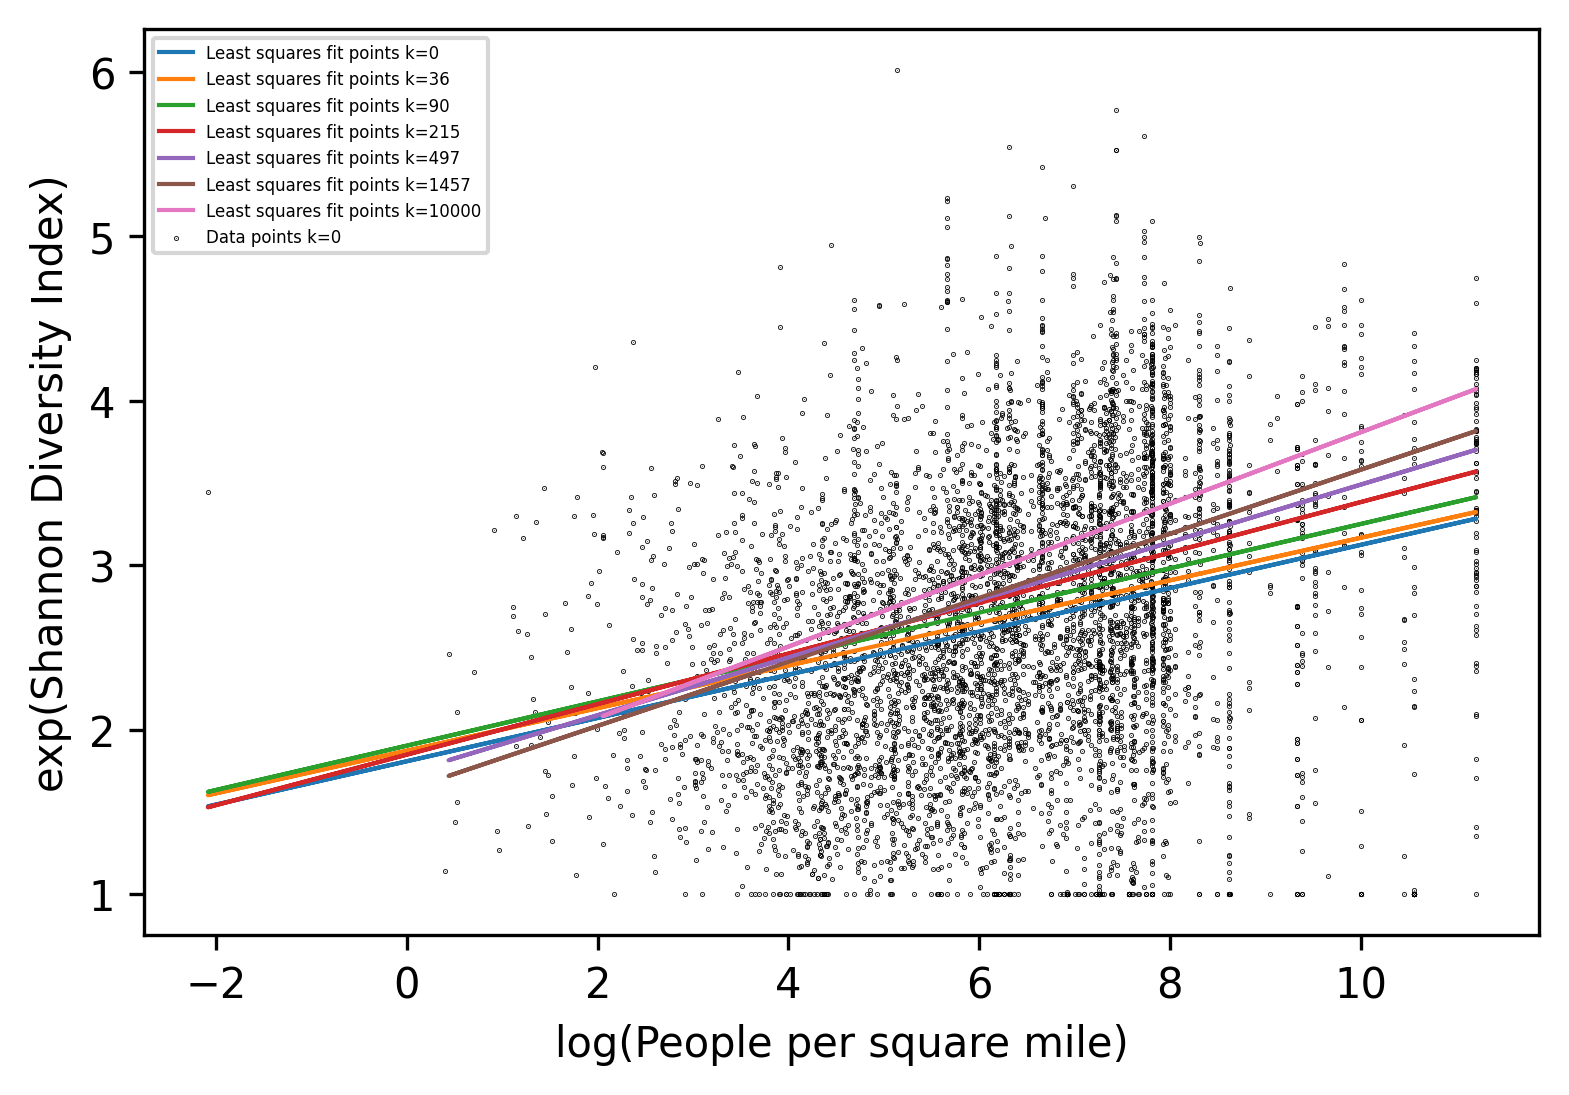

In [527]:
df = year_dfs[2020] #Recent year
xs = []
ys = []
coefs = []
for number in [0,36,90,215,497,1457, 10000]:
  restricted_df = df[df["eftotlt"] >= number]
  x = restricted_df["log_county_population_density"]
  y = restricted_df["true_diversity"]

  xs.append(x)
  ys.append(y)

  coef = np.polyfit(x,y,1)
  linear_func = np.poly1d(coef)

  coefs.append(coef)
  
  if number==0:
    plt.scatter(x, y, s = 0.05, label=f"Data points k={number}",color="black",alpha=0.9)
  plt.plot(x,linear_func(x), linewidth=1, label=f"Least squares fit points k={number}")

plt.legend(prop={"size":4})
plt.xlabel("log(People per square mile)")
plt.ylabel("exp(Shannon Diversity Index)")
plt.savefig('true_diversity_against_log_density.png')

In [528]:
rhos = []
for x, y,coef in zip(xs,ys,coefs):
  rhos.append((np.corrcoef(x,y)[0,1],coef))
rhos

[(0.2649148076977561, array([0.13160457, 1.80764818])),
 (0.2656270653583092, array([0.12952765, 1.87157739])),
 (0.28806770287686684, array([0.13480011, 1.90260772])),
 (0.34521679734949773, array([0.1535886 , 1.84799348])),
 (0.4023191235057852, array([0.17529658, 1.73711899])),
 (0.43001207796322793, array([0.19473854, 1.6331875 ])),
 (0.47907972991953324, array([0.21727911, 1.63570581]))]

In [530]:
from scipy.stats import linregress

df = year_dfs[2020] #Recent year
restricted_df = df[df["eftotlt"] >= 1457]
x = restricted_df["log_county_population_density"]
y = restricted_df["true_diversity"]

result = linregress(x,y, alternative = "two-sided")
t_stat = result.slope/result.stderr
result, t_stat

(LinregressResult(slope=0.19473854397127524, intercept=1.6331874960241872, rvalue=0.4300120779632279, pvalue=2.6092695971777867e-95, stderr=0.008924167736634124, intercept_stderr=0.056817089826389056),
 21.821479573032278)

In [531]:
from scipy.stats import shapiro

residuals = restricted_df.apply(lambda row:
                                    (linear_func(row.log_county_population_density)-row.true_diversity), axis = 1)
stat, p = shapiro(residuals)
stat, p

(0.9954895377159119, 5.728470114263473e-06)

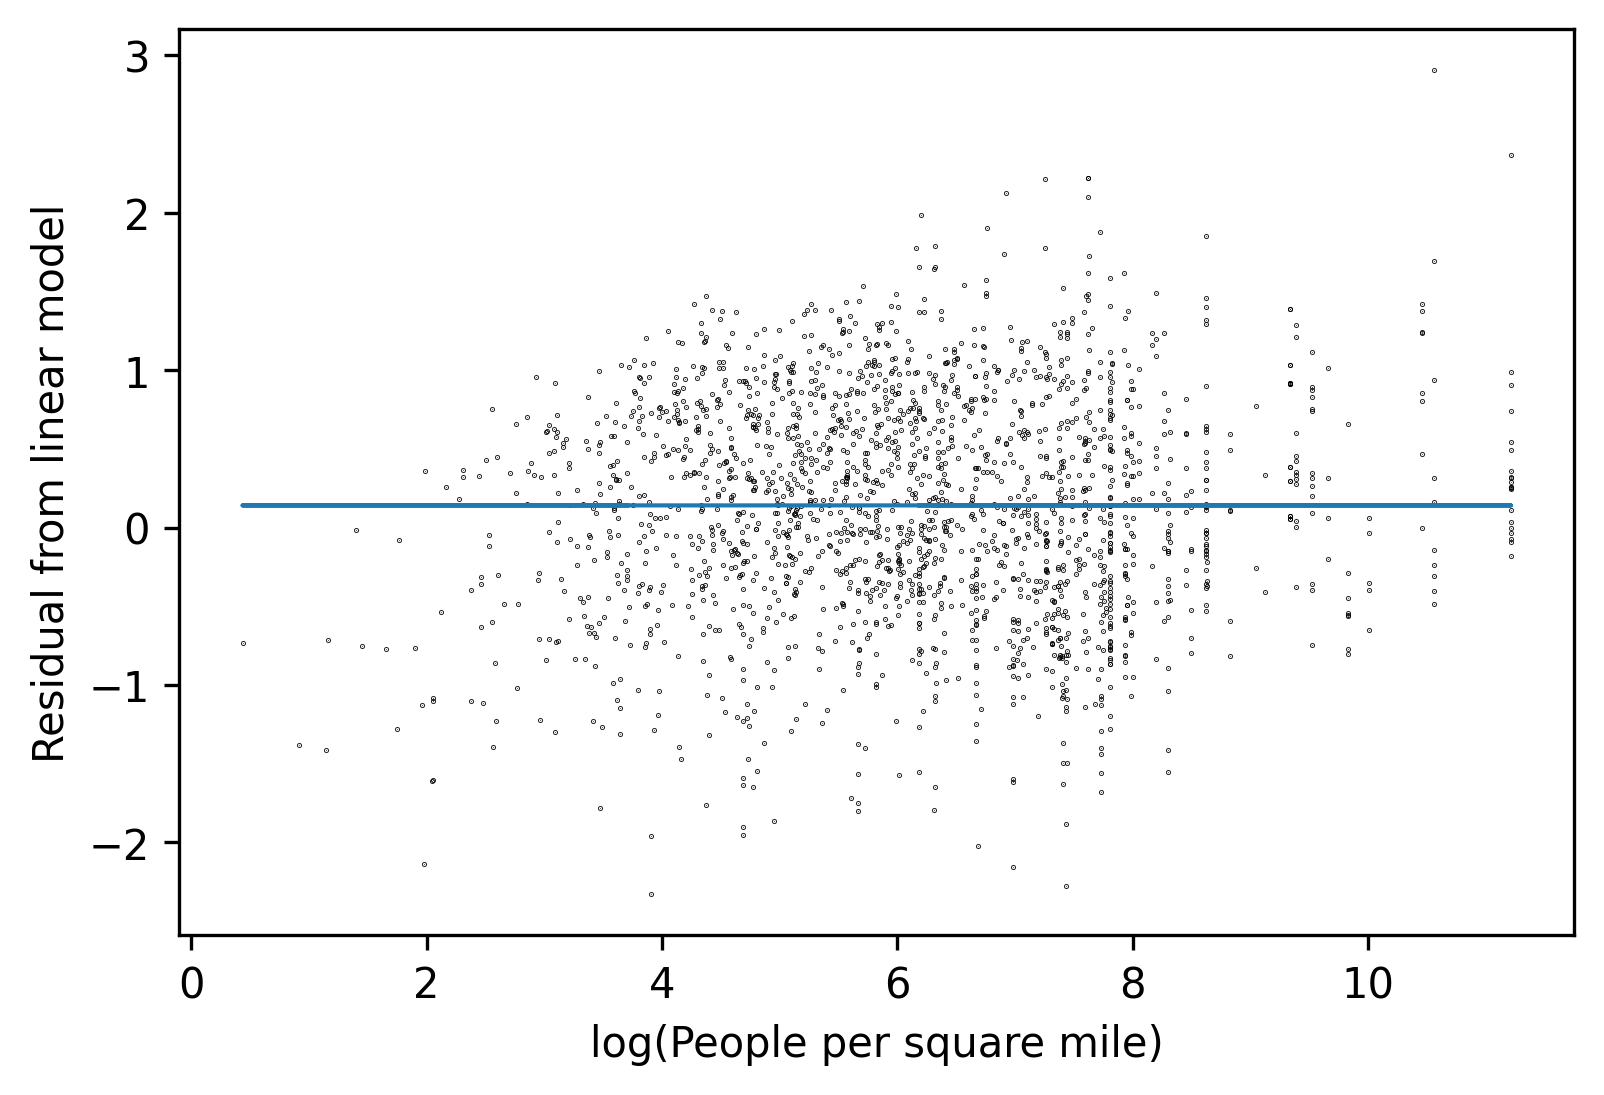

In [552]:
x = restricted_df["log_county_population_density"]
y = residuals
plt.scatter(x, y, s = 0.05,color="black",alpha=0.9)
plt.plot(x,[y.mean()]*len(x), linewidth=1)
plt.xlabel("log(People per square mile)")
plt.ylabel("Residual from linear model")
plt.show()

In [553]:
import statsmodels.stats.api as sms

np_array_x = np.array(x)
result = sms.het_breuschpagan(residuals, np_array_x.reshape(-1,1))
result

(692.4796677565691, nan, 1032.4361452224096, 1.365496118200204e-184)